In [9]:
import qiskit
from qiskit.backends import BaseBackend
from qiskit.backends.ibmq import IBMQBackend

In [14]:
from qiskit_qml.feature_maps import NormedAmplitudeEncoding
from qiskit_qml.distance_based.hadamard import QmlHadamardNeighborClassifier
from qiskit_qml.distance_based.hadamard.state import QmlGenericStateCircuitBuilder
from qiskit_qml.distance_based.hadamard.state.sparsevector import MöttönenStatePreparation

initial_state_builder = QmlGenericStateCircuitBuilder(MöttönenStatePreparation())

execution_backend: BaseBackend = qiskit.Aer.get_backend('qasm_simulator')
qml = QmlHadamardNeighborClassifier(backend=execution_backend,
                                    shots=8192, 
                                    classifier_state_factory=initial_state_builder,
                                    feature_map=NormedAmplitudeEncoding())

In [10]:
import numpy as np

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

X, y = load_wine(True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [11]:
pipeline = Pipeline([
    ('scaler',  StandardScaler()),
    ('pca2',  PCA(n_components=2)),
    ('l2norm', Normalizer(norm='l2', copy=True)),
    ('qml', qml)
])

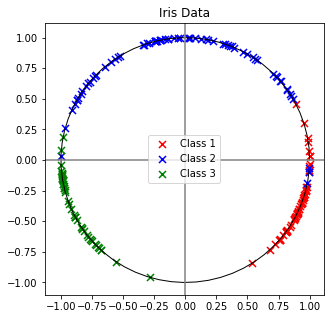

In [12]:
import matplotlib.pyplot as plt


_X = pipeline.fit_transform(X, y)

figure = plt.figure(figsize=(5,5), num=2)
sub1 = figure.subplots(nrows=1, ncols=1)

class_0_data = np.asarray([_X[i] for i in range(len(_X)) if y[i] == 0])
class_1_data = np.asarray([_X[i] for i in range(len(_X)) if y[i] == 1])
class_2_data = np.asarray([_X[i] for i in range(len(_X)) if y[i] == 2])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
class_2 = sub1.scatter(class_2_data[:,0], class_2_data[:,1], color='green', marker='x', s=50)

sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)

sub1.set_title("Iris Data")
sub1.legend([class_0, class_1, class_2], ["Class 1", "Class 2", "Class 3"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

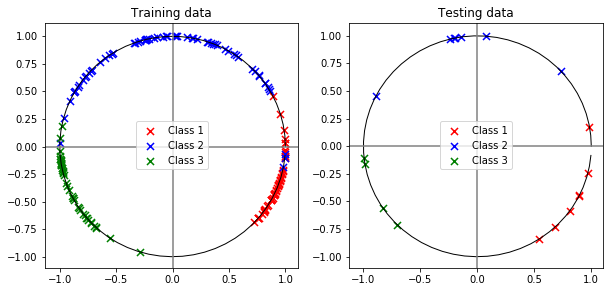

In [17]:
from sklearn.model_selection import train_test_split

_X_train, _X_test = pipeline.tranform(X_train), pipeline.transform(X_test)

figure = plt.figure(figsize=(10,4.5), num=2)
sub1, sub2 = figure.subplots(nrows=1, ncols=2)

class_0_data = np.asarray([_X_train[i] for i in range(len(_X_train)) if y_train[i] == 0])
class_1_data = np.asarray([_X_train[i] for i in range(len(_X_train)) if y_train[i] == 1])
class_2_data = np.asarray([_X_train[i] for i in range(len(_X_train)) if y_train[i] == 2])

class_0 = sub1.scatter(class_0_data[:,0], class_0_data[:,1], color='red', marker='x', s=50)
class_1 = sub1.scatter(class_1_data[:,0], class_1_data[:,1], color='blue', marker='x', s=50)
class_2 = sub1.scatter(class_2_data[:,0], class_2_data[:,1], color='green', marker='x', s=50)

sub1.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)

sub1.set_title("Training data")
sub1.legend([class_0, class_1, class_2], ["Class 1", "Class 2", "Class 3"])
sub1.axvline(color='gray')
sub1.axhline(color='gray')

class_0_data_test = np.asarray([_X_test[i] for i in range(len(_X_test)) if y_test[i] == 0])
class_1_data_test = np.asarray([_X_test[i] for i in range(len(_X_test)) if y_test[i] == 1])
class_2_data_test = np.asarray([_X_test[i] for i in range(len(_X_test)) if y_test[i] == 2])

class_0 = sub2.scatter(class_0_data_test[:,0], class_0_data_test[:,1], color='red', marker='x', s=50)
class_1 = sub2.scatter(class_1_data_test[:,0], class_1_data_test[:,1], color='blue', marker='x', s=50)
class_2 = sub2.scatter(class_2_data_test[:,0], class_2_data_test[:,1], color='green', marker='x', s=50)

sub2.plot([np.cos(x) for x in np.arange(0, 2*np.pi, 0.1)], [np.sin(x) for x in np.arange(0, 2*np.pi, 0.1)], 
          color='black', linewidth=1)
sub2.set_title("Testing data")
sub2.legend([class_0, class_1, class_2], ["Class 1", "Class 2", "Class 3"])
sub2.axvline(color='gray')
sub2.axhline(color='gray')

In [16]:
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

In [21]:
prediction

[0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1]

## Accuracy

In [18]:
"Test Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction, y_test)])/len(prediction)
)

'Test Accuracy: 0.9444444444444444'

In [19]:
prediction_train = pipeline.predict(X_train)

In [20]:
"Train Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction_train, y_train)])/len(prediction_train)
)

'Train Accuracy: 0.9125'

## Comparison to theoretical results

In [21]:
for i in range(len(_X_test)):
    print("{:.4f} ~~ {:.4f}".format(qml.last_predict_p_acc[i], 
                                    QmlHadamardNeighborClassifier.p_acc_theory(_X_train, y_train, _X_test[i])))

0.5142 ~~ 0.4985
35.6477 ~~ 0.4747
5.6364 ~~ 0.4756
5.5989 ~~ 0.4989
5.6056 ~~ 0.5443
5.4849 ~~ 0.4824
5.6046 ~~ 0.5368
5.6556 ~~ 0.4594
5.5583 ~~ 0.5439
5.4779 ~~ 0.4733
5.6281 ~~ 0.5274
5.5062 ~~ 0.4554
5.4554 ~~ 0.5089
5.4979 ~~ 0.5018
5.4093 ~~ 0.4912
5.6912 ~~ 0.5396
0.5051 ~~ 0.5381
0.4935 ~~ 0.5379


In [22]:
for i in range(len(_X_test)):
    print("{:.4f} ~~ {:.4f}".format(qml.last_predict_probability[i], 
                                   QmlHadamardNeighborClassifier.p_label_theory(_X_train, y_train, _X_test[i], prediction[i])))

0.6327 ~~ 0.6386
0.4092 ~~ 0.1494
0.4628 ~~ 0.5523
0.4090 ~~ 0.6383
0.4281 ~~ 0.6399
0.3779 ~~ 0.6277
0.4391 ~~ 0.6452
0.4787 ~~ 0.5796
0.4668 ~~ 0.5455
0.3877 ~~ 0.5594
0.4277 ~~ 0.5641
0.4173 ~~ 0.5684
0.4050 ~~ 0.6257
0.4007 ~~ 0.5463
0.4037 ~~ 0.6387
0.4497 ~~ 0.6460
0.6266 ~~ 0.6458
0.6310 ~~ 0.6457


In [22]:
print(qml._last_predict_circuits[0].qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg ancilla[1];
qreg index[8];
qreg data[1];
qreg qlabel[2];
creg clabel[2];
creg branch[1];
ry(1.10403098774760) qlabel[1];
cx qlabel[1],qlabel[0];
ry(0.837215003154816) qlabel[0];
cx qlabel[1],qlabel[0];
ry(0.837215003154816) qlabel[0];
cx qlabel[1],data[0];
ry(0.342460271355601) data[0];
cx qlabel[0],data[0];
ry(-0.363924057253649) data[0];
cx qlabel[1],data[0];
ry(0.109655220045199) data[0];
cx qlabel[0],data[0];
ry(0.816039548654449) data[0];
cx qlabel[1],index[7];
ry(0.233330279319581) index[7];
cx data[0],index[7];
ry(0.0351799489054834) index[7];
cx qlabel[0],index[7];
ry(0.0291085686426272) index[7];
cx data[0],index[7];
ry(-0.233230209229748) index[7];
cx qlabel[1],index[7];
ry(0.232536866539876) index[7];
cx data[0],index[7];
ry(-0.0159531258324694) index[7];
cx qlabel[0],index[7];
ry(-0.00988174556961312) index[7];
cx data[0],index[7];
ry(0.699097355089206) index[7];
cx qlabel[1],index[6];
ry(0.191614575052919) index[6];
cx index[7],inde